In [2]:
from google.colab import drive

drive.mount('/content/drive')
!ls "/content/drive/My Drive/"
!pip3 install patool
import patoolib



Mounted at /content/drive
'advance algorithms'			  nndl_pr4-dis_pytorch.state
'Assembly Quiz  (File responses)'	  nndl_pr4-gan-dis_pytorch-500.model
'Assembly Quiz .gform'			  nndl_pr4-gan-dis_pytorch-500.state
'Colab Notebooks'			  nndl_pr4-gan-dis_pytorch.model
'Copy of COVID,Non COVID-CT Images.rar'   nndl_pr4-gan-dis_pytorch.state
'Copy of filter3_fast.ipynb'		  nndl_pr4-gen_pytorch-500.model
 dataset				  nndl_pr4-gen_pytorch-500.state
'How to get started with Drive.pdf'	  nndl_pr4-gen_pytorch.model
'load test.gsheet'			  nndl_pr4-gen_pytorch.state
 me_vs_adp.gsheet			 'Thesis(14).docx'
 models					 'Thesis(14).pdf'
'Model Selection.gsheet'		 'Untitled document.gdoc'
 nndl_pr4-dis_pytorch-2.model		  wh.gsheet
 nndl_pr4-dis_pytorch-2.state		  y_km
 nndl_pr4-dis_pytorch.model		 'لیست پرداخت ها.gsheet'
     |████████████████████████████████| 77 kB 4.7 MB/s 


In [3]:
patoolib.extract_archive("/content/drive/My Drive/Copy of COVID,Non COVID-CT Images.rar", outdir="/home/")


patool: Extracting /content/drive/My Drive/Copy of COVID,Non COVID-CT Images.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/My Drive/Copy of COVID,Non COVID-CT Images.rar"
patool:     with cwd='/home/'
patool: ... /content/drive/My Drive/Copy of COVID,Non COVID-CT Images.rar extracted to `/home/'.


'/home/'

In [4]:
!ls "/home/COVID,Non COVID-CT Images/train"
import glob

print(len(glob.glob("/home/COVID,Non COVID-CT Images/test/COVID/*")))

COVID  Non-COVID
252


In [5]:
from matplotlib.pyplot import imread, imshow
from skimage.transform import resize
from skimage.color import rgb2gray
import numpy as np
import random


covid_path = "/home/COVID,Non COVID-CT Images/train/COVID/*"
noncovid_path = "/home/COVID,Non COVID-CT Images/train/Non-COVID/*"

covid = glob.glob(covid_path)
noncovid = glob.glob(noncovid_path)

image_path = covid + noncovid
labels = [1 for _ in covid] + [0 for _ in noncovid]
labels = np.array(labels)

x = []
for img in image_path:
  img_data = rgb2gray(imread(img))
  new_img = resize(img_data, (256, 256))
  x.append(new_img)

x = np.array(x).reshape((len(x), 1, 256, 256)) 
np.random.seed(123)
np.random.shuffle(x)
np.random.seed(123)
np.random.shuffle(labels)

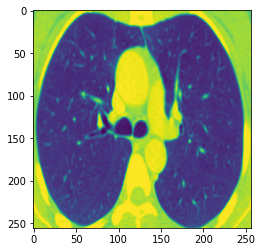

In [6]:
imshow(x[20, 0].reshape((256, 256)))
x = x / 255.0

In [7]:
import torch

class ConvNet(torch.nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()

        self.group1_conv = torch.nn.Conv2d(1, 4, kernel_size=5, stride=1, padding=2)
        self.group1_bn = torch.nn.BatchNorm2d(4)
        self.group1_tanh = torch.nn.Tanh()
        self.group1_avgpool = torch.nn.AvgPool2d(5, stride=2, padding=2)

        torch.nn.init.normal_(self.group1_conv.weight, 0, 0.01)

        self.group2 = torch.nn.Sequential(
            torch.nn.Conv2d(4, 8, kernel_size=5, bias=True, stride=1, padding=2),
            torch.nn.BatchNorm2d(8),
            torch.nn.Tanh(),
            torch.nn.AvgPool2d(5, stride=2, padding=2)
        )
        torch.nn.init.normal_(self.group2[0].weight, 0, 0.01)

        self.group3 = torch.nn.Sequential(
            torch.nn.Conv2d(8, 16, kernel_size=5, bias=True, stride=1, padding=2),
            torch.nn.BatchNorm2d(16),
            torch.nn.ReLU(),
            torch.nn.AvgPool2d(5, stride=2, padding=2),
        )
        torch.nn.init.normal_(self.group3[0].weight, 0, 0.01)

        self.group4 = torch.nn.Sequential(
            torch.nn.Conv2d(16, 32, kernel_size=5, bias=True, stride=1, padding=2),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),
            torch.nn.AvgPool2d(5, stride=2, padding=2),
        )
        torch.nn.init.normal_(self.group4[0].weight, 0, 0.01)

        self.group5 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=5, bias=True, stride=1, padding=2),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),
            torch.nn.AvgPool2d(5, stride=2, padding=2),
        )
        torch.nn.init.normal_(self.group5[0].weight, 0, 0.01)

        self.group6 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=5, bias=True, stride=1, padding=2),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(),
            torch.nn.AvgPool2d(5, stride=2, padding=2),
        )
        torch.nn.init.normal_(self.group6[0].weight, 0, 0.01)

        self.group7 = torch.nn.Sequential(
            torch.nn.Conv2d(128, 256, kernel_size=5, bias=True, stride=1, padding=2),
            torch.nn.BatchNorm2d(256),
            torch.nn.ReLU(),
            torch.nn.AvgPool2d(5, stride=2, padding=2),
        )
        torch.nn.init.normal_(self.group7[0].weight, 0, 0.01)

        self.group8 = torch.nn.Sequential(
            torch.nn.Conv2d(256, 512, kernel_size=5, bias=True, stride=1, padding=2),
            torch.nn.BatchNorm2d(512),
            torch.nn.ReLU(),
            torch.nn.AvgPool2d(5, stride=2, padding=2),
        )
        torch.nn.init.normal_(self.group8[0].weight, 0, 0.01)

        self.group9 = torch.nn.Sequential(
            torch.nn.Linear(1024, 100),
            torch.nn.Linear(100, 1),

        )
        torch.nn.init.normal_(self.group9[0].weight, 0, 0.01)
        torch.nn.init.normal_(self.group9[1].weight, 0, 0.01)



    def forward(self, x):
        x1 = self.group1_conv(x)
        x1 = torch.abs(x1)
        x1 = self.group1_bn(x1)
        x1 = self.group1_tanh(x1)
        x1 = self.group1_avgpool(x1)
        # print(x1.size())
        x2 = self.group2(x1)
        # print(x2.size())
        x3 = self.group3(x2)
        # print(x3.size())
        x3 = self.group4(x3)
        # print(x3.size())
        x3 = self.group5(x3)
        # print(x3.size())
        x3 = self.group6(x3)
        # print(x3.size())
        x3 = self.group7(x3)
        # print(x3.size())
        #x3 = self.group8(x3)
        #print(x3.size())
        (_, C, H, W) = x3.data.size()
        x3 = x3.view(-1, C * H * W)
        # print(x3.size())
        x3 = self.group9(x3)
        # print(x3.size())
        x3 = torch.nn.functional.sigmoid(x3)
        return x3





In [8]:
print(x.shape)
print(labels.shape)

(1999, 1, 256, 256)
(1999,)


In [67]:
import numpy as np
import torch
import torch.optim as optim
import time
import psutil
import glob
import os


def trainNet(net, batch_size, n_epochs, learning_rate, step_lr, lr_decay,
             train_data, train_label, save_path, save_every_n_epoch, valid_acc_thr,
             is_cuda, verbose=True):
    cuda_cpu = 'cpu'
    if is_cuda:
        cuda_cpu = 'cuda'
        net.cuda()
    # Create our loss and optimizer functions
    loss = torch.nn.BCELoss()
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)
    # optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    sched = optim.lr_scheduler.StepLR(optimizer, step_lr, lr_decay)

    # Time for printing

    x_train = np.copy(train_data[:1600])
    x_valid = np.copy(train_data[1600:])

    y_train = np.copy(train_label[:1600]).reshape((1600, 1))
    y_valid = np.copy(train_label[1600:]).reshape((399, 1))

    num_batch_train = x_train.shape[0] // batch_size
    num_batch_valid = x_valid.shape[0] // batch_size

    best_valid_acc = 0
    best_valid_epoch = 0

    print('=' * 23 + 'Model' + '=' * 22)
    print(net)
    print('=' * 18 + 'Start Training' + '=' * 18)
    print(f'num_batch_train: {num_batch_train}')

    training_start_time = time.time()
    # Loop for n_epochs
    for epoch in range(n_epochs):
        start_time_epoch = time.time()
        total_train_loss = 0
        correct_epoch = 0
        for batch in range(num_batch_train):
            x_batch = torch.from_numpy(x_train[batch*batch_size:(batch+1)*batch_size]).float().to(cuda_cpu)
            y_batch = torch.from_numpy(y_train[batch*batch_size:(batch+1)*batch_size]).float().to(cuda_cpu)

            # Set the parameter gradients to zero
            optimizer.zero_grad()

            # Forward pass, backward pass, optimize
            out = net(x_batch)
            # print(y_batch.size(), out.size())
            # print(out)
            batch_loss = loss(out, y_batch)
            batch_loss.backward()
            optimizer.step()
            sched.step()
            # out = outputs.to('cpu')
            out[out >= 0.5] = 1
            out[out < 0.5] = 0

            correct_batch = (out == y_batch).sum().item()
            correct_epoch += correct_batch

            acc = 100.0 * correct_batch / batch_size

            # Print statistics
            total_train_loss += batch_loss.data
            if verbose:
                print('train:[%d],step:%d,loss:%f, acc:%f' % (epoch, batch, batch_loss, acc))

        valid_loss = 0
        correct_valid = 0
        with torch.no_grad():
            for batch in range(num_batch_valid):
                x_batch = torch.from_numpy(x_valid[batch*batch_size:(batch+1)*batch_size]).float().to(cuda_cpu)
                y_batch = torch.from_numpy(y_valid[batch*batch_size:(batch+1)*batch_size]).float().to(cuda_cpu)

                # Forward pass
                out = net(x_batch)
                valid_loss += loss(out, y_batch)
                
                # out = outputs.to('cpu')
                out[out >= 0.5] = 1
                out[out < 0.5] = 0

                correct_valid += (out == y_batch).sum().item()
                # print(correct_batch, out.size())
        print('=' * 50)
        train_loss = total_train_loss / num_batch_train
        train_acc = 100.0 * correct_epoch / (batch_size * num_batch_train)
        valid_loss = valid_loss / num_batch_valid
        valid_acc = 100.0 * correct_valid / (batch_size * num_batch_valid)
        end_time_epoch = time.time()
        if valid_acc >= best_valid_acc:
            best_valid_acc = valid_acc
            best_valid_epoch = epoch
            if valid_acc >= valid_acc_thr:
                #torch.save(net.state_dict(), save_path + '/xu_valid_acc_' + str(valid_acc) + '_epoch' + str(epoch)
                #           + '.state')
                #torch.save(classification.state_dict(), save_path + '/clf_xu_valid_acc_' + str(valid_acc) + '_epoch' + str(epoch)
                #           + '.state')
                #torch.save(net, save_path + '/xu_valid_acc_' + str(valid_acc) + '_epoch' + str(epoch) + ".model")
                #torch.save(classification, save_path + '/clf_xu_valid_acc_' + str(valid_acc) + '_epoch' + str(epoch) + ".model")
                pass
        print('epoch[%d] | train:: loss:%f, acc:%f | valid:: loss: %f, acc: %f | ETA: %f minutes | best valid acc: %f, '
              'best valid acc epoch: %d | lr: %f' % (epoch, train_loss, train_acc, valid_loss, valid_acc,
                                                     (end_time_epoch - start_time_epoch) / 60, best_valid_acc,
                                                     best_valid_epoch, optimizer.param_groups[0]['lr']))
        print('=' * 50)
        if (epoch+1) % save_every_n_epoch == 0:
          pass
            #torch.save(net.state_dict(), save_path + '/xu_pytorch_epoch' + str(epoch) + '.state')
            #torch.save(classification.state_dict(), save_path + '/clf_xu_pytorch_epoch' + str(epoch) + '.state')
            #torch.save(net, save_path + '/xu_pytorch_epoch' + str(epoch) + ".model")
            #torch.save(classification, save_path + '/clf_xu_pytorch_epoch' + str(epoch) + ".model")
    #torch.save(net.state_dict(), save_path + '/xu_pytorch_final.state')
    #torch.save(classification.state_dict(), save_path + '/clf_xu_pytorch_final.state')
    #torch.save(net, save_path + '/xu_pytorch_final.model')
    #torch.save(classification, save_path + '/clf_xu_pytorch_final.model')
    print("Training finished, took {:.2f}s".format(time.time() - training_start_time))
    return net

net = trainNet(ConvNet(),
             32,
             20,
             0.001,
             100,
             0.9,
             x,
             labels,
             "",
             20,
             65,
             True,
             False)

=======================Model======================
ConvNet(
  (group1_conv): Conv2d(1, 4, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (group1_bn): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (group1_tanh): Tanh()
  (group1_avgpool): AvgPool2d(kernel_size=5, stride=2, padding=2)
  (group2): Sequential(
    (0): Conv2d(4, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Tanh()
    (3): AvgPool2d(kernel_size=5, stride=2, padding=2)
  )
  (group3): Sequential(
    (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): AvgPool2d(kernel_size=5, stride=2, padding=2)
  )
  (group4): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affi

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch[0] | train:: loss:0.542103, acc:73.937500 | valid:: loss: 0.466814, acc: 80.729167 | ETA: 0.031138 minutes | best valid acc: 80.729167, best valid acc epoch: 0 | lr: 0.001000
epoch[1] | train:: loss:0.441984, acc:79.625000 | valid:: loss: 0.359940, acc: 85.937500 | ETA: 0.029620 minutes | best valid acc: 85.937500, best valid acc epoch: 1 | lr: 0.000900
epoch[2] | train:: loss:0.378540, acc:84.000000 | valid:: loss: 0.376166, acc: 83.593750 | ETA: 0.029795 minutes | best valid acc: 85.937500, best valid acc epoch: 1 | lr: 0.000900
epoch[3] | train:: loss:0.356245, acc:85.000000 | valid:: loss: 0.367274, acc: 84.635417 | ETA: 0.029693 minutes | best valid acc: 85.937500, best valid acc epoch: 1 | lr: 0.000810
epoch[4] | train:: loss:0.323301, acc:86.125000 | valid:: loss: 0.340603, acc: 86.718750 | ETA: 0.029771 minutes | best valid acc: 86.718750, best valid acc epoch: 4 | lr: 0.000810
epoch[5] | train:: loss:0.307422, acc:87.062500 | valid:: loss: 0.357669, acc: 83.593750 | ETA:

In [9]:
from matplotlib.pyplot import imread, imshow
from skimage.transform import resize
from skimage.color import rgb2gray
import numpy as np
import random


covid_path = "/home/COVID,Non COVID-CT Images/test/COVID/*"
noncovid_path = "/home/COVID,Non COVID-CT Images/test/Non-COVID/*"

covid = glob.glob(covid_path)
noncovid = glob.glob(noncovid_path)

image_path = covid + noncovid
labels_test_org = [1 for _ in covid] + [0 for _ in noncovid]
labels_test_org = np.array(labels_test_org).reshape((len(labels_test_org), 1))

x_test_org = []
for img in image_path:
  img_data = rgb2gray(imread(img))
  new_img = resize(img_data, (256, 256))
  x_test_org.append(new_img)

x_test_org = np.array(x_test_org).reshape((len(x_test_org), 1, 256, 256)) 
x_test_org /= 255


In [70]:
batch_size = 1
num_batch_test = x_test.shape[0] // batch_size
net.eval()
cuda_cpu = 'cuda'
loss = torch.nn.BCELoss()
test_loss = 0
correct_test = 0
with torch.no_grad():
    for batch in range(num_batch_test):
        x_batch = torch.from_numpy(x_test[batch*batch_size:(batch+1)*batch_size]).float().to(cuda_cpu)
        y_batch = torch.from_numpy(labels_test[batch*batch_size:(batch+1)*batch_size]).float().to(cuda_cpu)

        # Forward pass
        out = net(x_batch)
        test_loss += loss(out, y_batch)
        
        # out = outputs.to('cpu')
        out[out >= 0.5] = 1
        out[out < 0.5] = 0

        correct_test += (out == y_batch).sum().item()
        # print(correct_batch, out.size())
print('=' * 50)
test_loss = test_loss / num_batch_test
test_acc = 100.0 * correct_test / (batch_size * num_batch_test)
print(f'test_loss: {test_loss}, test_acc: {test_acc}')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


test_loss: 46.746009826660156, test_acc: 47.9253112033195


In [ ]:
# torch.save(net, '/content/drive/My Drive/' + '/nndl_pr4-dis_pytorch-3.model')
# torch.save(net.state_dict(), '/content/drive/My Drive/' + 'nndl_pr4-dis_pytorch-3.state')
pass

In [10]:
import torch 
from torch import nn


class _netD(nn.Module):
    def __init__(self):
        super(_netD, self).__init__()

        # Convolution 1
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 16, 3, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.6, inplace=False),
        )
        # Convolution 2
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 3, 2, 1, bias=False),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.6, inplace=False),
        )
        # Convolution 3
        self.conv3 = nn.Sequential(
            nn.Conv2d(32, 64, 3, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.6, inplace=False),
        )
        # Convolution 4
        self.conv4 = nn.Sequential(
            nn.Conv2d(64, 128, 3, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.6, inplace=False),
        )
        # Convolution 5
        self.conv5 = nn.Sequential(
            nn.Conv2d(128, 256, 3, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.6, inplace=False),
        )
        # Convolution 6
        self.conv6 = nn.Sequential(
            nn.Conv2d(256, 512, 3, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.6, inplace=False),
        )
        # discriminator fc
        self.fc_dis = nn.Linear(4*4*512, 1)
        # aux-classifier fc
        self.fc_aux = nn.Linear(4*4*512, 1)
        # softmax and sigmoid
        self.softmax = nn.LogSoftmax()
        self.sigmoid = nn.Sigmoid()

    def forward(self, input):
        conv1 = self.conv1(input)
        # print(conv1.size())
        conv2 = self.conv2(conv1)
        # print(conv2.size())
        conv3 = self.conv3(conv2)
        # print(conv3.size())
        conv4 = self.conv4(conv3)
        # print(conv4.size())
        conv5 = self.conv5(conv4)
        # print(conv5.size())
        conv6 = self.conv6(conv5)
        # print(conv6.size())
        flat6 = conv6.view(-1, 4*4*512)
        # print(flat6.size())
        fc_dis = self.fc_dis(flat6)
        fc_aux = self.fc_aux(flat6)
        classes = self.sigmoid(fc_aux)
        realfake = self.sigmoid(fc_dis)
        return realfake, classes



class _netG(nn.Module):
    def __init__(self, nz):
        super(_netG, self).__init__()
        self.nz = nz

        # first linear layer
        self.fc1 = nn.Linear(100, 768)
        # Transposed Convolution 2
        self.tconv2 = nn.Sequential(
            nn.ConvTranspose2d(768, 384, 5, 2, 0, bias=False),
            nn.BatchNorm2d(384),
            nn.ReLU(True),
        )
        # Transposed Convolution 3
        self.tconv3 = nn.Sequential(
            nn.ConvTranspose2d(384, 256, 5, 2, 0, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
        )
        # Transposed Convolution 4
        self.tconv4 = nn.Sequential(
            nn.ConvTranspose2d(256, 192, 5, 2, 0, bias=False),
            nn.BatchNorm2d(192),
            nn.ReLU(True),
        )
        # Transposed Convolution 5
        self.tconv5 = nn.Sequential(
            nn.ConvTranspose2d(192, 64, 5, 2, 0, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
        )
        
        self.tconv6 = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 5, 2, 0, bias=False),
            nn.BatchNorm2d(32),
            nn.ReLU(True),
        )
        # Transposed Convolution 5
        self.tconv7 = nn.Sequential(
            nn.ConvTranspose2d(32, 1, 8, 2, 0, bias=False),
            nn.Sigmoid(),
        )

    def forward(self, input):
        input = input.view(-1, self.nz)
        fc1 = self.fc1(input)
        # print(fc1.size())
        fc1 = fc1.view(-1, 768, 1, 1)
        tconv2 = self.tconv2(fc1)
        # print(tconv2.size())
        tconv3 = self.tconv3(tconv2)
        # print(tconv3.size())
        tconv4 = self.tconv4(tconv3)
        # print(tconv4.size())
        tconv5 = self.tconv5(tconv4)
        # print(tconv5.size())
        tconv5 = self.tconv6(tconv5)
        # print(tconv5.size())
        tconv5 = self.tconv7(tconv5)
        # print(tconv5.size())
        output = tconv5
        return output

gnet = _netG(100)
dnet = _netD()
x__ = np.zeros((2, 100, 1, 1))
x_batch = torch.from_numpy(x__).float()

a = gnet(x_batch)
b = dnet(a)

In [ ]:
import numpy as np
import torch
import torch.optim as optim
import time
import psutil
import glob
import os


def trainNet(netG, netD, batch_size, n_epochs, learning_rate, step_lr, lr_decay,
             train_data, train_label, save_path, save_every_n_epoch, valid_acc_thr,
             is_cuda, verbose=True):
    cuda_cpu = 'cpu'
    if is_cuda:
        cuda_cpu = 'cuda'
        netG.cuda()
        netD.cuda()
    # Create our loss and optimizer functions
    dis_loss = torch.nn.BCELoss()
    # aux_loss = torch.nn.NLLLoss()
    aux_loss = torch.nn.BCELoss()

    dis_optimizer = optim.Adam(netD.parameters(), lr=learning_rate)
    gen_optimizer = optim.Adam(netG.parameters(), lr=learning_rate)
    # optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    dis_sched = optim.lr_scheduler.StepLR(dis_optimizer, step_lr, lr_decay)
    gen_sched = optim.lr_scheduler.StepLR(gen_optimizer, step_lr, lr_decay)

    # Time for printing
    
    x_train = np.copy(train_data)
    # x_train = np.copy(train_data[:1600])
    # x_valid = np.copy(train_data[1600:])

    y_train = np.copy(train_label).reshape((1999, 1))
    # y_train = np.copy(train_label[:1600]).reshape((1600, 1))
    # y_valid = np.copy(train_label[1600:]).reshape((399, 1))

    num_batch_train = x_train.shape[0] // batch_size
    # num_batch_valid = x_valid.shape[0] // batch_size

    nz = 100
    noise = torch.FloatTensor(batch_size, nz, 1, 1)
    fixed_noise = torch.FloatTensor(batch_size, nz, 1, 1).normal_(0, 1)
    y_fake_batch = torch.from_numpy(np.zeros((batch_size, 1))).float().to(cuda_cpu)
    y_real_batch = torch.from_numpy(np.ones((batch_size, 1))).float().to(cuda_cpu)

    print('=' * 23 + 'Model' + '=' * 22)
    print(netG)
    print('=' * 18 + 'Start Training' + '=' * 18)
    print(f'num_batch_train: {num_batch_train}')

    training_start_time = time.time()
    # Loop for n_epochs
    for epoch in range(n_epochs):
        start_time_epoch = time.time()
        total_train_loss_d = 0
        total_train_loss_g = 0
        correct_epoch = 0
        for batch in range(num_batch_train):
            correct = 0
            x_batch = torch.from_numpy(x_train[batch*batch_size:(batch+1)*batch_size]).float().to(cuda_cpu)
            y_batch = torch.from_numpy(y_train[batch*batch_size:(batch+1)*batch_size]).float().to(cuda_cpu)
            
            ###########################
            # (1) Update D network
            ###########################
            # train with real
            netD.zero_grad()
            
            s_output, c_output = netD(x_batch)
            s_errD_real = dis_loss(s_output, y_real_batch)
            c_errD_real = aux_loss(c_output, y_batch)
            errD_real = s_errD_real + c_errD_real
            errD_real.backward()
            ########################################################################################
            c_output[c_output >= 0.5] = 1 
            c_output[c_output < 0.5] = 0 
            # _, pred = torch.max(c_output, 1)
            correct = (c_output == y_batch).sum().item()
            correct_epoch += correct
            

            # train with fake
            noise.data.resize_(batch_size, nz, 1, 1)
            noise.data.normal_(0, 1)

            label = np.random.randint(0, 2, batch_size)
            noise_ = np.random.normal(0, 1, (batch_size, nz))
            noise_[:, 0] = label
            
            noise_ = (torch.from_numpy(noise_))
            noise_ = noise_.resize_(batch_size, nz, 1, 1)
            noise.data.copy_(noise_)

            y_batch = torch.from_numpy(label.reshape((batch_size, 1))).float().to(cuda_cpu)

            fake = netG(noise.to(cuda_cpu))
            
            s_output,c_output = netD(fake.detach())
            s_errD_fake = dis_loss(s_output, y_fake_batch)
            c_errD_fake = aux_loss(c_output, y_batch)
            errD_fake = s_errD_fake + c_errD_fake

            errD_fake.backward()
            D_G_z1 = s_output.data.mean()
            errD = errD_fake + errD_real
            s_errD = s_errD_fake + s_errD_real
            c_errD = c_errD_fake + c_errD_real
            dis_optimizer.step()
            dis_sched.step()

            total_train_loss_d += errD


            ###########################
            # (2) Update G network
            ###########################
            netG.zero_grad()
            fake = netG(noise.to(cuda_cpu))
            s_output,c_output = netD(fake)
            s_errG = dis_loss(s_output, y_real_batch)
            c_errG = aux_loss(c_output, y_batch)
            
            errG = s_errG + c_errG
            errG.backward()
            D_G_z2 = s_output.data.mean()
            gen_optimizer.step()

            # second time train
            errG2 = 0
            for _ in range(2):
                netG.zero_grad()
                noise.data.resize_(batch_size, nz, 1, 1)
                noise.data.normal_(0, 1)

                label = np.random.randint(0, 2, batch_size)
                noise_ = np.random.normal(0, 1, (batch_size, nz))
                noise_[:, 0] = label
                
                noise_ = (torch.from_numpy(noise_))
                noise_ = noise_.resize_(batch_size, nz, 1, 1)
                noise.data.copy_(noise_)

                fake = netG(noise.to(cuda_cpu))
                s_output,c_output = netD(fake)
                s_errG = dis_loss(s_output, y_real_batch)
                c_errG = aux_loss(c_output, y_batch)
                
                errG_tmp = s_errG + c_errG
                errG_tmp.backward()
                errG2 += errG_tmp 
                D_G_z2 = s_output.data.mean()
                gen_optimizer.step()
            gen_sched.step()
            
            total_train_loss_g += (errG + errG2)/3

            if verbose:
                print('train:[%d],step:%d,errD:%f,s_errD:%f, c_errD:%f, errG:%f,s_errG:%f,c_errG:%f, acc:%f' % (epoch, batch, errD, s_errD, c_errD, errG, s_errG, c_errG,  100.*correct/batch_size))
        
        end_time_epoch = time.time()
        print('=' * 50)
        print('epoch[%d] | train:: loss_d:%f, loss_g: %f, acc:%f | ETA: %f minutes | lr: %f' % (epoch, total_train_loss_d/num_batch_train, total_train_loss_g/num_batch_train,100.*correct_epoch/(batch_size*num_batch_train),
                                                     (end_time_epoch - start_time_epoch) / 60, dis_optimizer.param_groups[0]['lr']))
        print('=' * 50)
        # if (epoch+1) % save_every_n_epoch == 0:
        #   pass
        if epoch % 10 == 1:
          torch.save(netD.state_dict(), save_path + '/netD_' + str(epoch) + '.state')
          torch.save(netG.state_dict(), save_path + '/netG_' + str(epoch) + '.state')
          torch.save(netD, save_path + '/netD_' + str(epoch) + ".model")
          torch.save(netG, save_path + '/netG_' + str(epoch) + ".model")
    torch.save(netD.state_dict(), save_path + '/netD.state')
    torch.save(netG.state_dict(), save_path + '/netG.state')
    torch.save(netD, save_path + '/netD.model')
    torch.save(netG, save_path + '/clf_xu_pytorch_final.model')
    print("Training finished, took {:.2f}s".format(time.time() - training_start_time))
    return netG, netD

# netD = NetD()
netD = _netD()
# netG = NetG(100, 32, 1)
netG = _netG(100)

netG, netD = trainNet(netG, netD,
                      32,
                      500,
                      0.0001,
                      2220,
                      0.9,
                      x,
                      labels,
                      "/content/drive/My Drive/models",
                      20,
                      65,
                      True,
                      True)

Streaming output truncated to the last 5000 lines.
train:[423],step:6,errD:2.216027,s_errD:1.398268, c_errD:0.817759, errG:1.379138,s_errG:1.083214,c_errG:1.007854, acc:81.250000
train:[423],step:7,errD:1.586200,s_errD:0.997399, c_errD:0.588801, errG:1.239128,s_errG:1.495030,c_errG:0.843889, acc:81.250000
train:[423],step:8,errD:2.794584,s_errD:2.057892, c_errD:0.736692, errG:1.360583,s_errG:0.839004,c_errG:1.173460, acc:78.125000
train:[423],step:9,errD:2.494072,s_errD:1.844849, c_errD:0.649223, errG:0.893120,s_errG:1.241204,c_errG:0.645198, acc:81.250000
train:[423],step:10,errD:2.109632,s_errD:1.404227, c_errD:0.705405, errG:1.499988,s_errG:1.106119,c_errG:0.857632, acc:81.250000
train:[423],step:11,errD:2.408340,s_errD:1.501390, c_errD:0.906949, errG:1.056755,s_errG:0.936975,c_errG:1.223974, acc:75.000000
train:[423],step:12,errD:2.430144,s_errD:1.538788, c_errD:0.891356, errG:1.699518,s_errG:1.169089,c_errG:0.963039, acc:68.750000
train:[423],step:13,errD:1.887614,s_errD:1.311619,

In [ ]:
netG.eval()
netD.eval()

torch.save(netG, '/content/drive/My Drive/' + '/nndl_pr4-gen_pytorch-500.model')
torch.save(netG.state_dict(), '/content/drive/My Drive/' + 'nndl_pr4-gen_pytorch-500.state')
torch.save(netG, '/content/drive/My Drive/' + '/nndl_pr4-gan-dis_pytorch-500.model')
torch.save(netG.state_dict(), '/content/drive/My Drive/' + 'nndl_pr4-gan-dis_pytorch-500.state')

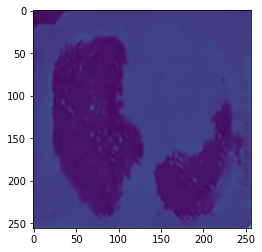

In [35]:
netG = torch.load('/content/drive/My Drive/nndl_pr4-gen_pytorch-500.model')
# netG = torch.load('/content/drive/My Drive/models/netG_451.model')
dis = torch.load('/content/drive/My Drive/nndl_pr4-dis_pytorch.model')

num_generated = 500
generated_label = np.random.randint(0, 2, num_generated)
noise_ = np.random.normal(0, 1, (num_generated, 100))
noise_[:, 0] = 1-generated_label

noise_ = (torch.from_numpy(noise_))
noise_ = noise_.resize_(num_generated, 100, 1, 1).float()
generated_x = netG(noise_.to('cuda'))

generated_x = generated_x.to('cpu').detach().numpy()
imshow(generated_x[25, 0])
# print(dis(img))
# imshow(x[10, 0])

In [37]:
from sklearn.metrics import accuracy_score

x_test = np.concatenate([generated_x, x_test_org])
labels_test = np.concatenate([generated_label.reshape((len(generated_label), 1)), labels_test_org])

# x_test = generated_x
# labels_test = generated_label.reshape((len(generated_label), 1))


np.random.seed(123)
np.random.shuffle(x_test)
np.random.seed(123)
np.random.shuffle(labels_test)

net = dis
batch_size = 1
num_batch_test = x_test.shape[0] // batch_size
net.eval()
cuda_cpu = 'cuda'
loss = torch.nn.BCELoss()
test_loss = 0
correct_test = 0
preds = np.zeros(len(labels_test))
preds_prob = np.zeros(len(labels_test))
i = 0
print(x_test.shape, labels_test.shape)
with torch.no_grad():
    for batch in range(num_batch_test):
        x_batch = torch.from_numpy(x_test[batch*batch_size:(batch+1)*batch_size]).float().to(cuda_cpu)
        y_batch = torch.from_numpy(labels_test[batch*batch_size:(batch+1)*batch_size]).float().to(cuda_cpu)

        # Forward pass
        out = net(x_batch)
        test_loss += loss(out, y_batch)
        
        # out = outputs.to('cpu')
        preds_prob[i] = out
        out[out >= 0.5] = 1
        out[out < 0.5] = 0
        preds[i] = out
        i += 1
        correct_test += (out == y_batch).sum().item()
        # print(correct_batch, out.size())
print('=' * 50)
test_loss = test_loss / num_batch_test
test_acc = 100.0 * correct_test / (batch_size * num_batch_test)
print(f'test_loss: {test_loss}, test_acc: {test_acc}')
print(accuracy_score(labels_test, preds))

(982, 1, 256, 256) (982, 1)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


test_loss: 1.9035608768463135, test_acc: 75.56008146639512
0.7556008146639511


acc: 0.7556008146639511
roc_auc_score: 0.7695547307514465
f1_score: 0.710843373493976
precision_score: 0.9609120521172638
recall_score: 0.5640535372848948
(982, 1)


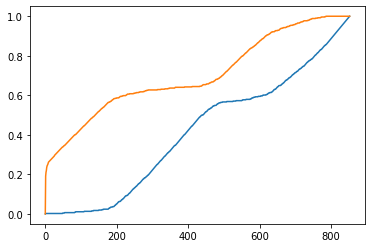

In [38]:
from sklearn.metrics import accuracy_score, auc, f1_score, precision_score, recall_score, roc_curve, roc_auc_score
from matplotlib import pyplot as plt
print('acc:', accuracy_score(labels_test, preds))
print('roc_auc_score:', roc_auc_score(labels_test, preds_prob))
print('f1_score:', f1_score(labels_test, preds))
print('precision_score:', precision_score(labels_test, preds))
print('recall_score:', recall_score(labels_test, preds))
# print('roc_curve:', roc_curve(labels_test, preds_prob))
print(labels_test.shape)
fpr, tpr, thresholds = roc_curve(labels_test.ravel(), preds_prob.ravel(), drop_intermediate=False)
plt.plot(fpr)
plt.plot(tpr)
plt.show()